# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [5]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [6]:
df.describe(exclude='number')

,job,marital,education,default,balance,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11137,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,3802,2,2,3,12,4,2
top,management,married,secondary,no,0 $,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,774,5881,9702,8042,2824,8326,5873


In [7]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код

df.isna().sum()[df.isna().sum() > 0]


balance    25
dtype: int64

### Задание 2

In [8]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код

df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

### Задание 3

In [9]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)

def balance_convert(balance):
    """Function for converting string value of balance 
    with incorrect forms such as comma and dollar sign 
    to float number
    
    Try-except is using as there're data missings

    Args:
        balance (str): Frature value from DataFrame

    Returns:
        float: Float number of balance
    """
    
    try: 
        match = re.search(r'-?[\d\s,]+', balance)
        
        float_value = float(
            match.group().replace(' ', '').replace(',', '.')
        )
        
        return float_value
    
    except:
        
        return np.nan

df['balance'] = df['balance'].apply(balance_convert)

In [10]:
print('Average salary value is {:.3f} $'.format(
    df['balance'].sum() / df['balance'].count()
    ))

Average salary value is 1529.129 $


### Задание 4

In [11]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку

df['balance'] = df['balance'].fillna(df['balance'].median())

print('Average salary value is {:.3f} $'.format(
    df['balance'].sum() / df['balance'].count()
    ))

Average salary value is 1526.936 $


### Задание 5

In [12]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения

df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()[0]

df.loc[df['education'] == 'unknown', 'education'] = df['education'].mode()[0]

display(df['job'].value_counts())
display(df['education'].value_counts())



job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

In [13]:
mask_mode_job = df['job'] == df['job'].mode()[0]
mask_mode_education = df['education'] == df['education'].mode()[0]

print('Average salary value for people wityh most populat job and education is {:.3f} $'.format(
    df[mask_mode_job & mask_mode_education]['balance'].mean()
    ))

Average salary value for people wityh most populat job and education is 1598.883 $


### Задание 6

In [14]:
iqr = df.balance.quantile(0.75) - df.balance.quantile(0.25)

left_bound = df.balance.quantile(0.25) - 1.5*iqr
right_bound = df.balance.quantile(0.75) + 1.5*iqr

print(left_bound, right_bound)

-2241.0 4063.0


In [15]:
# удалите все выбросы для признака balance
# Let's calculate IQR for balance feature
iqr = df.balance.quantile(0.75) - df.balance.quantile(0.25)

# Making left and right bounds for data
left_bound = df.balance.quantile(0.25) - 1.5*iqr
right_bound = df.balance.quantile(0.75) + 1.5*iqr

print('Left bound for balance feature is {:.0f} $'.format(left_bound))
print('Right bound for balance feature is {:.0f} $'.format(right_bound))

Left bound for balance feature is -2241 $
Right bound for balance feature is 4063 $


In [16]:
df_copy = df.copy()

In [17]:
# Creating indexes to drop based on outliers in balance feature 
indexes_to_drop = df[(df['balance'] < left_bound) | (df['balance'] > right_bound)].index

origin_qnt = df.shape[0]

# Droppng rows wich have ouliers balance values
df = df.drop(index=indexes_to_drop, axis=1)

after_dropping_qnt = df.shape[0]
dropped_qnt = origin_qnt - after_dropping_qnt

print(f'Were dropped {dropped_qnt} raws')

Were dropped 1057 raws


## Часть 2:  Разведывательный анализ

### Задание 1

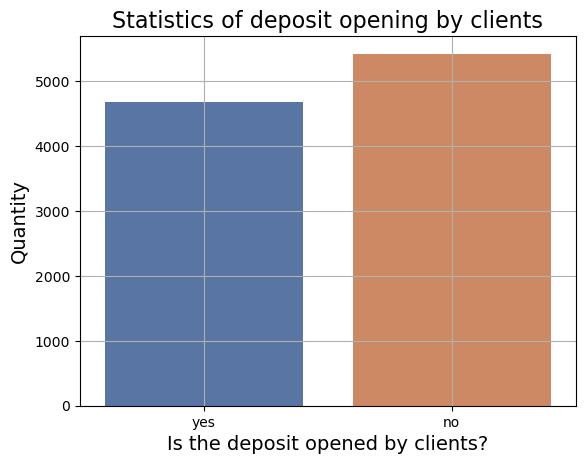

Quantity of clients who opend deposit = 4681, it's 46.32% of all clients
Quantity of clients who didn't open deposit = 5424, it's 53.68% of all clients


In [18]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
deposit_stat = sns.countplot(data=df, x='deposit', palette='deep')
deposit_stat.grid()
deposit_stat.set_title('Statistics of deposit opening by clients',
                       fontsize = 16)
deposit_stat.set_xlabel('Is the deposit opened by clients?',
                        fontsize = 14)
deposit_stat.set_ylabel('Quantity', fontsize = 14)

plt.show(deposit_stat)

opened_deposite_yes = df[df['deposit'] == 'yes']['deposit'].count()
opened_deposite_no = df[df['deposit'] == 'no']['deposit'].count()

opened_deposite_yes_ratio = (opened_deposite_yes / df.shape[0]) * 100
opened_deposite_no_ratio = (opened_deposite_no / df.shape[0]) * 100

print("Quantity of clients who opend deposit = {}, it's {:.2f}% of all clients".format(
    opened_deposite_yes, opened_deposite_yes_ratio
    ))

print("Quantity of clients who didn't open deposit = {}, it's {:.2f}% of all clients".format(
    opened_deposite_no, opened_deposite_no_ratio
    ))

From the constructed diagrams we can see that the distribution of the target feature is uniform. Both classes have approximately the same value.

### Задания 2 и 3

To check the influence of the presented numerical features on the target, we will construct Kdeplot diagrams. 

We will construct the diagrams in the following way. Within one diagram, the distribution of the feature of clients who opened a deposit and who did not open a deposit will be presented, and a distribution curve of all feature values ​​will also be constructed as a line.

One of the numeric features that we have is **day**. In the formulation that it is currently used, it does not make sense. Let's run a little ahead, into feature engineering, and create a new feature that will tell us how long ago the contact with the client was within the current campaign (we will rely on the most recent contact from the dataset). We will call this feature **since_last_call**.

We will also create a month feature, only in numerical terms. Let's call it **month_num**. It is clear that this feature will subsequently have a strong correlation with the **since_last_call** feature, but for clarity and reflection on the connections, it may be useful.

In [ ]:
# Creating feature in date-time format (it'll be auxiliary feature)
df['day_month'] = pd.to_datetime(
    df['day'].astype('str').str.zfill(2) + '-' + df['month'].astype('str'), 
    format='%d-%b'
    )

# The most recent contact date
last_contact = df['day_month'].max()

# Creating feature how many days ago was contact with a client
df['since_last_call'] = df['day_month'].apply(lambda x: last_contact - x)
df['since_last_call'] = df['since_last_call'].astype('str').apply(
    lambda x: int(x.split(' ')[0]))

# Creatig feature in numeric format
df['month_num'] = pd.to_datetime(df['month'], format='%b').dt.month

For now we're ready to make visualisation.

In [20]:
# List of numeric feature 
num_cols = df.select_dtypes('number').columns.to_list()

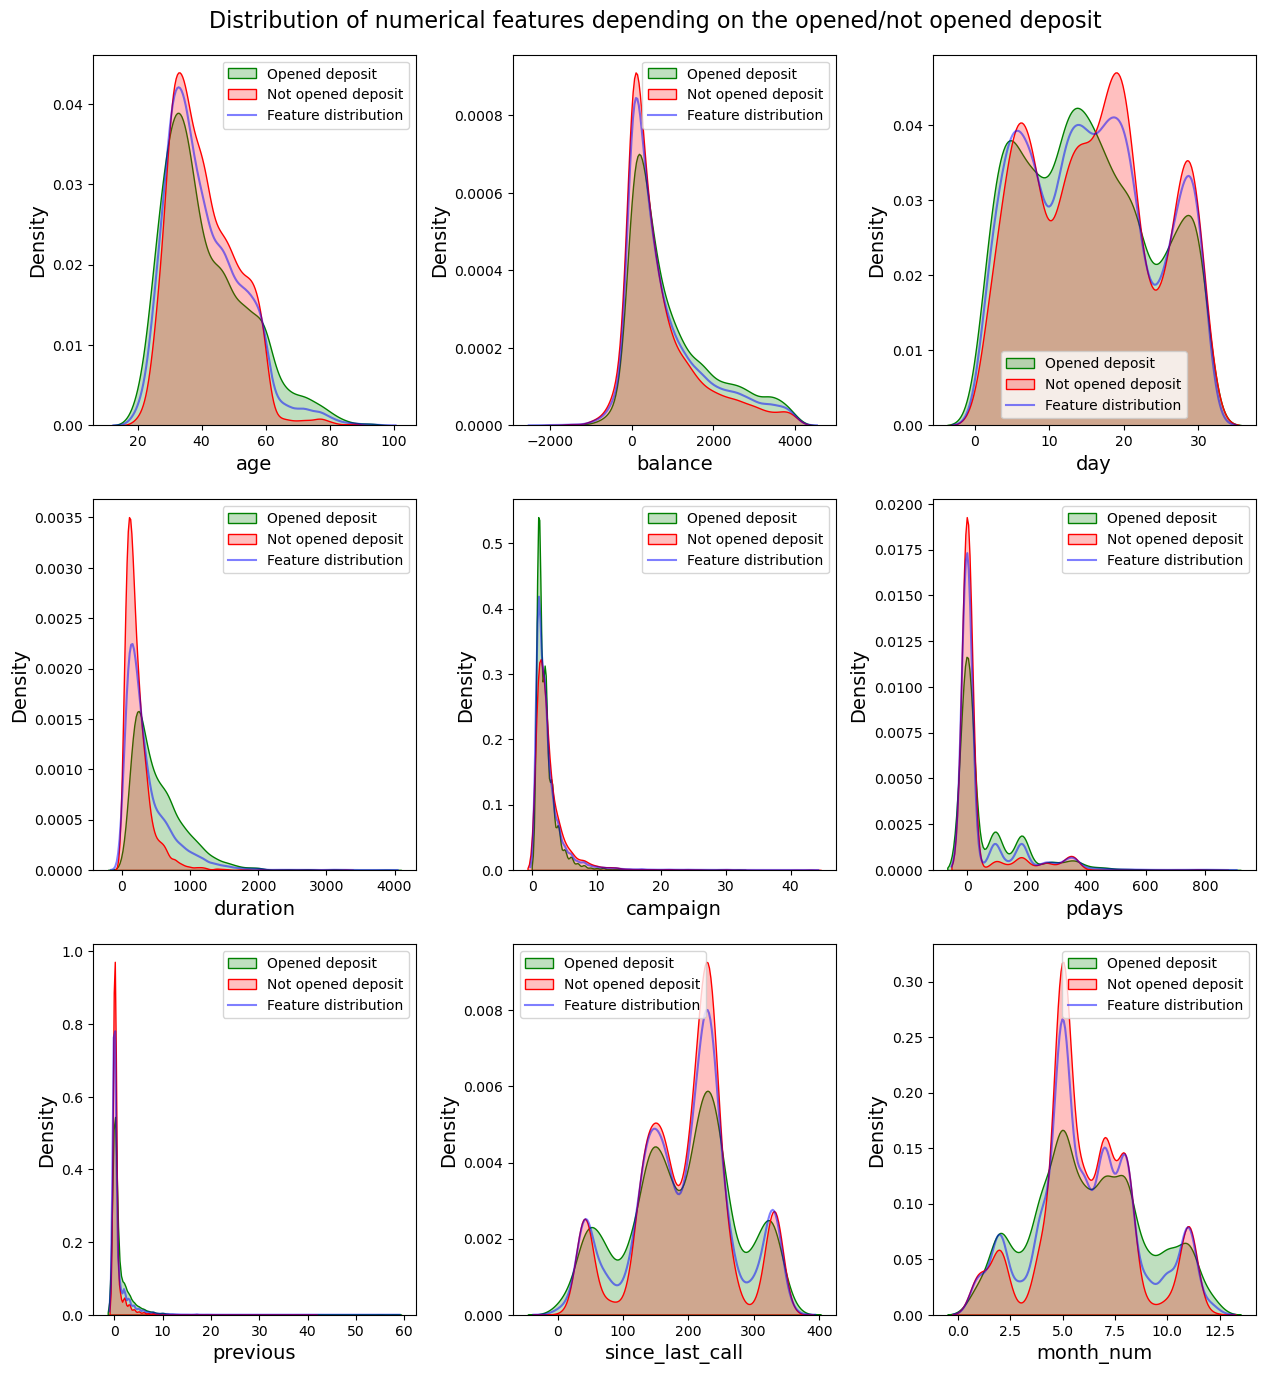

In [21]:
# making subplots for diagrams
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
plt.subplots_adjust(wspace=0.3, top=0.95)

# For loop - diagrams creating
for ax, feature in zip(axes.flat, num_cols):
    
    # Kde for clients who opend deposit
    kde_plot_yes = sns.kdeplot(
        df[df['deposit']=='yes'][feature], 
        label="Opened deposit", shade=True, color='green',
        ax=ax
    )
    
    # Kde for clients who haven't opend deposit
    kde_plot_no = sns.kdeplot(
        df[df['deposit']=='no'][feature], 
        label="Not opened deposit", shade=True, color='red',
        ax=ax
    )
    
    # Summary feature distribution
    kde_plot_no = sns.kdeplot(
        df[feature], 
        label="Feature distribution", shade=False, color='blue', alpha=0.5,
        ax=ax
    )
    
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    
    kde_plot_yes.legend()    
    kde_plot_no.legend()

plt.suptitle('Distribution of numerical features depending on the opened/not opened deposit',
             fontsize=16);

So, based on the constructed distribution diagrams, we can draw preliminary conclusions and put forward the first assumptions regarding the influence of various features on the target:

- **Age** – most of the distribution of features in two categories duplicates each other, however, a slight bias is visible from the age of 60+ years towards those who opened a deposit.
Balance – based on the constructed diagrams, it seems that this feature will have a weak correlation with the target feature, although this seems unexpected.

- **Day** – no noticeable differences are observed.

- **Duration** – there are discrepancies by group. It is clear that in the share of clients with a longer conversation duration, the number of clients who opened a deposit increases. Of course, the question remains open as to how much a longer contact influenced the decision, perhaps the client already had a desire / attitude to open a deposit, and a longer telephone conversation is a clarification of the nuances.

- **Campaign** – an interesting distribution, it is clear that the share of clients who opened a deposit had a small number of contacts. But, this refers exactly to the reasoning above. Clients who have not opened a deposit have a greater number of contacts. In this regard, a logical question arises about the advisability of a large number of calls to clients who have already refused and spending campaign funds on this.

- **Pdays** - no patterns (differences in distributions) are observed

- **Previous** - no patterns (differences in distributions) are observed

- **Since_last_call** and **month_num** - let's consider both of these features together, due to the correlation mentioned above. Here we see that there are dependencies on the season and the opening of deposits. It is clear that clients were more willing to do this in the spring and autumn.

Now we will make the similar analysis for categorical features.

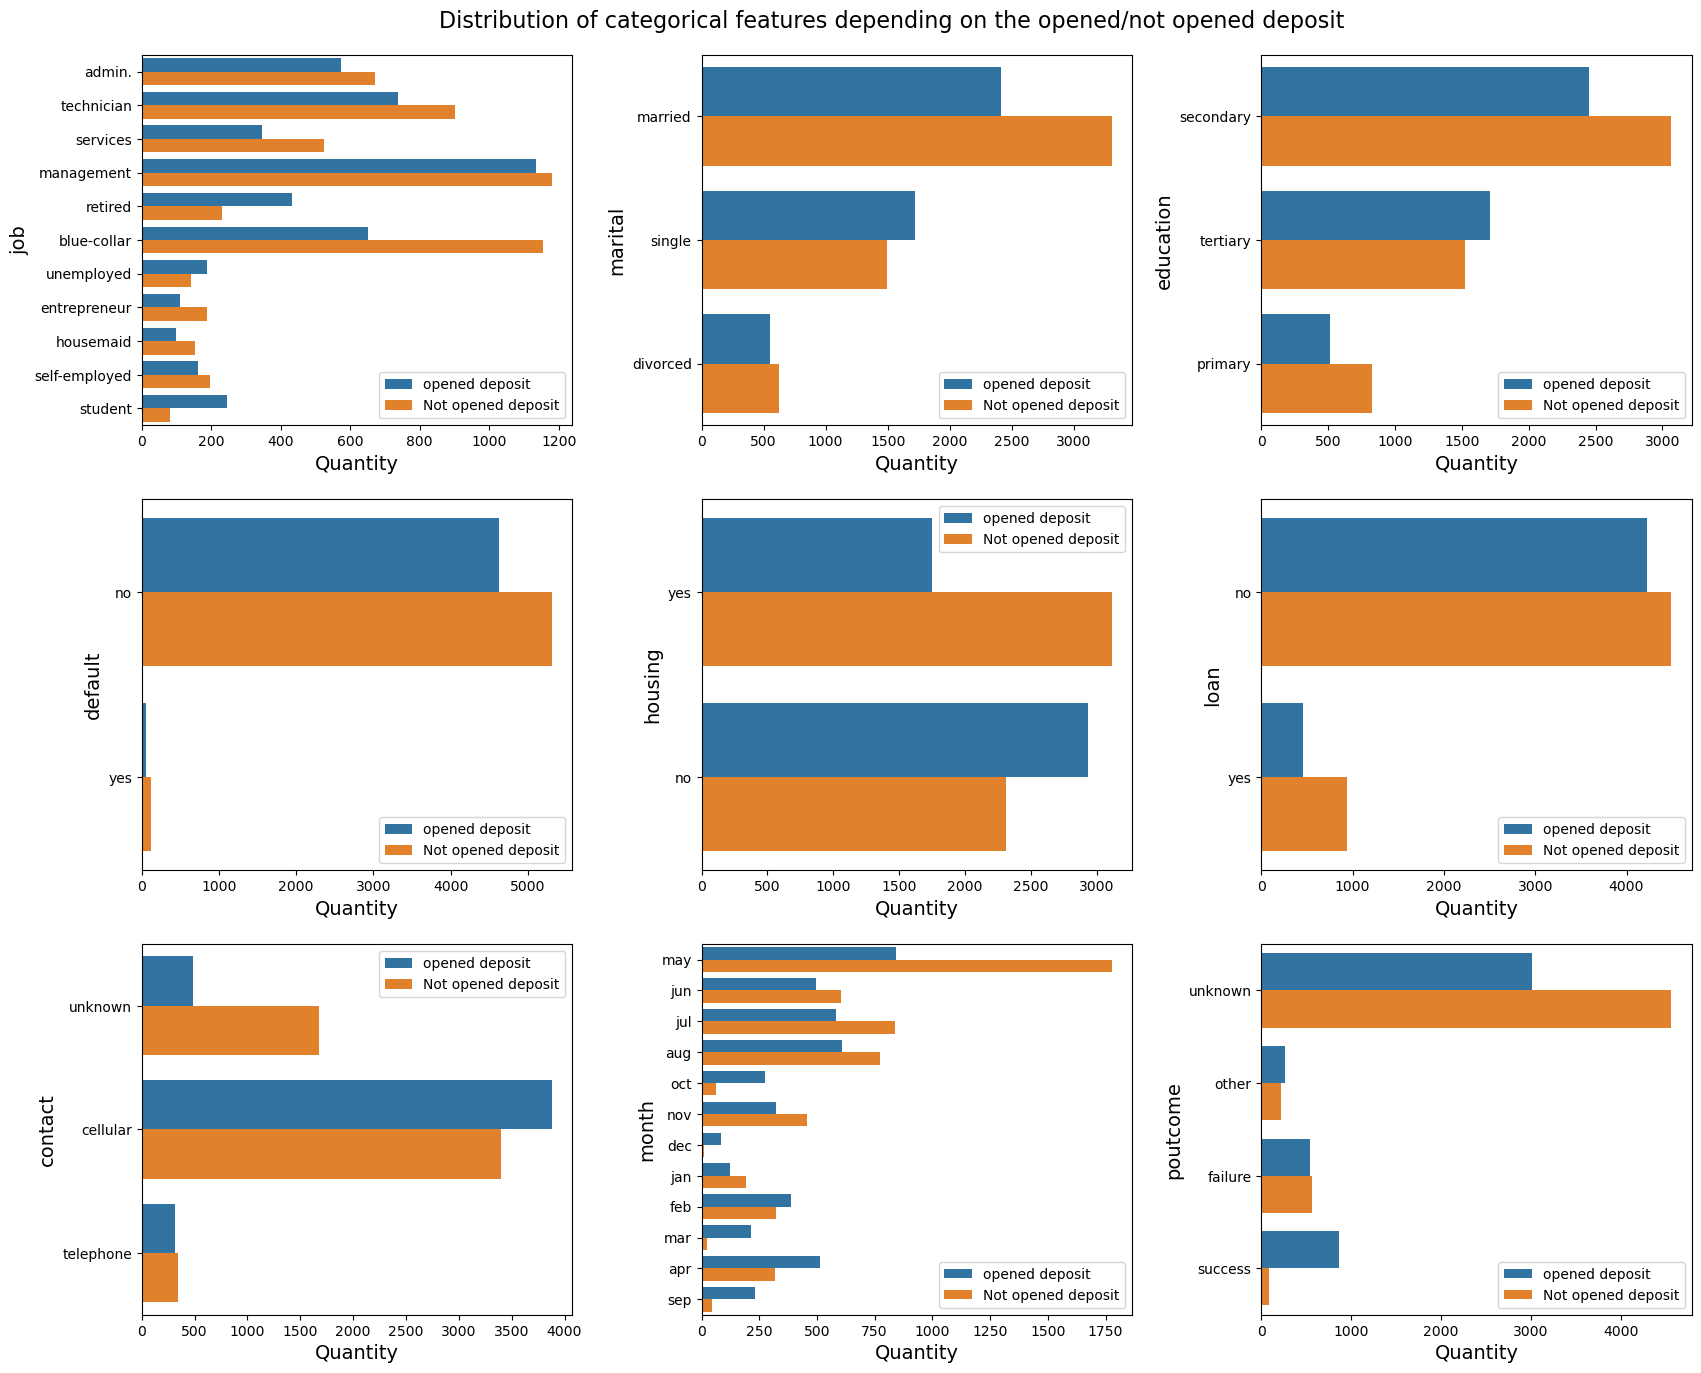

In [22]:
# List of categorical features for diagrams build-up
cat_cols = df.select_dtypes('object').columns.to_list()[:-1]

# making subplots for diagrams
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
plt.subplots_adjust(wspace=0.3, top=0.95)

# For loop - diagrams creating
for ax, feature in zip(axes.flat, cat_cols):
    
    countplot_feat = sns.countplot(data=df, y=feature, hue='deposit', ax=ax)
    
    countplot_feat.set_xlabel('Quantity')
    
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    
    # new legend signs
    legend_labels = {'yes': 'opened deposit', 'no': 'Not opened deposit'}
    
    # getting legend
    handles, labels = ax.get_legend_handles_labels()
    
    # creating new legend signs
    new_labels = [legend_labels.get(label, label) for label in labels]
    
    # adjusting new legend
    ax.legend(handles=handles, labels=new_labels)
    
plt.suptitle('Distribution of categorical features depending on the opened/not opened deposit',
             fontsize=16);

**CONCLUSION**

In [23]:
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60','60+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

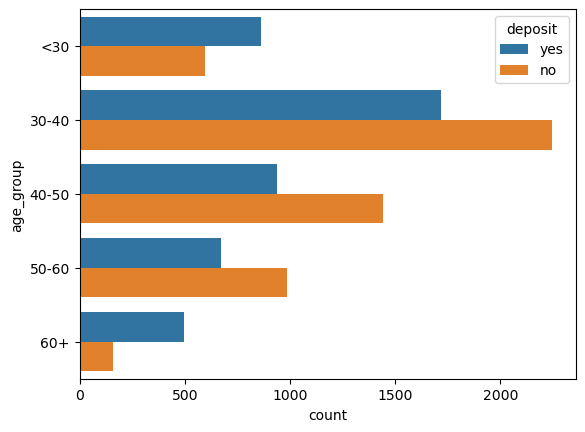

In [24]:
countplot_feat = sns.countplot(data=df, y='age_group', hue='deposit')

In [25]:
education_martial_dep = pd.pivot_table(
    data=df[df['deposit'] == 'yes'], index='education', columns='marital', values='deposit', aggfunc='count'
)

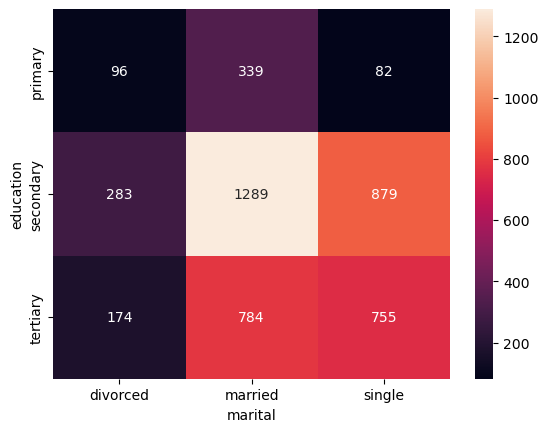

In [26]:
sns.heatmap(education_martial_dep, annot=True, fmt='.0f');

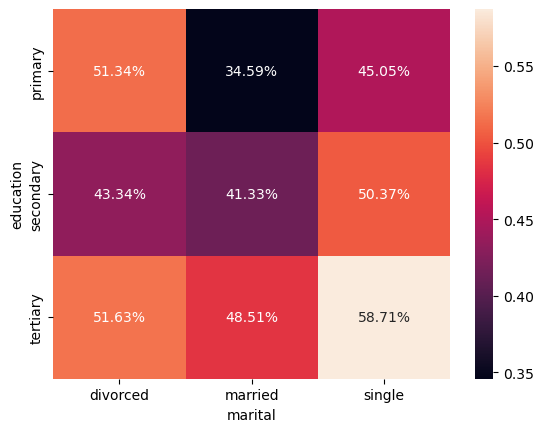

In [27]:
edu_mart_dep_crosstab = pd.crosstab([df['education'], df['marital']], df['deposit'])

edu_mart_dep_ratio_alt = edu_mart_dep_crosstab['yes'] / edu_mart_dep_crosstab.sum(axis=1)

edu_mart_dep_ratio_pivot = edu_mart_dep_ratio_alt.unstack()

sns.heatmap(edu_mart_dep_ratio_pivot, annot=True, fmt=".2%");


### Задания 4 и 5

In [28]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

### Задание 6

In [29]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

### Задание 7

In [30]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

### Задание 8

In [31]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

### Задания 9 и 10

In [32]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [33]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [34]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

### Задание 11

In [35]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

## Часть 3: преобразование данных

### Задание 1

### Задания 2 и 3

In [36]:
# преобразуйте бинарные переменные в представление из нулей и единиц

binary_list = ['default', 'housing', 'loan', 'deposit']

for feature in binary_list:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)
    
df['deposit'].std().round(3)


0.499

In [37]:
list_for_task = ['default', 'housing', 'loan']

answer = 0

for feature in list_for_task:
    answer += df[feature].mean()
    
print(round(answer, 3))

0.635


### Задание 4

In [ ]:
# создайте дамми-переменные

In [ ]:
df_copy = df.copy()

dummie_columns = ['job', 'marital', 'contact', 'month', 'poutcome']

dummies_features = pd.get_dummies(df_copy, columns=dummie_columns)

In [46]:
all_list = list(dummies_features.columns)
len(all_list)
all_list

['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'day_month',
 'since_last_call',
 'month_num',
 'age_group',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

<Axes: >

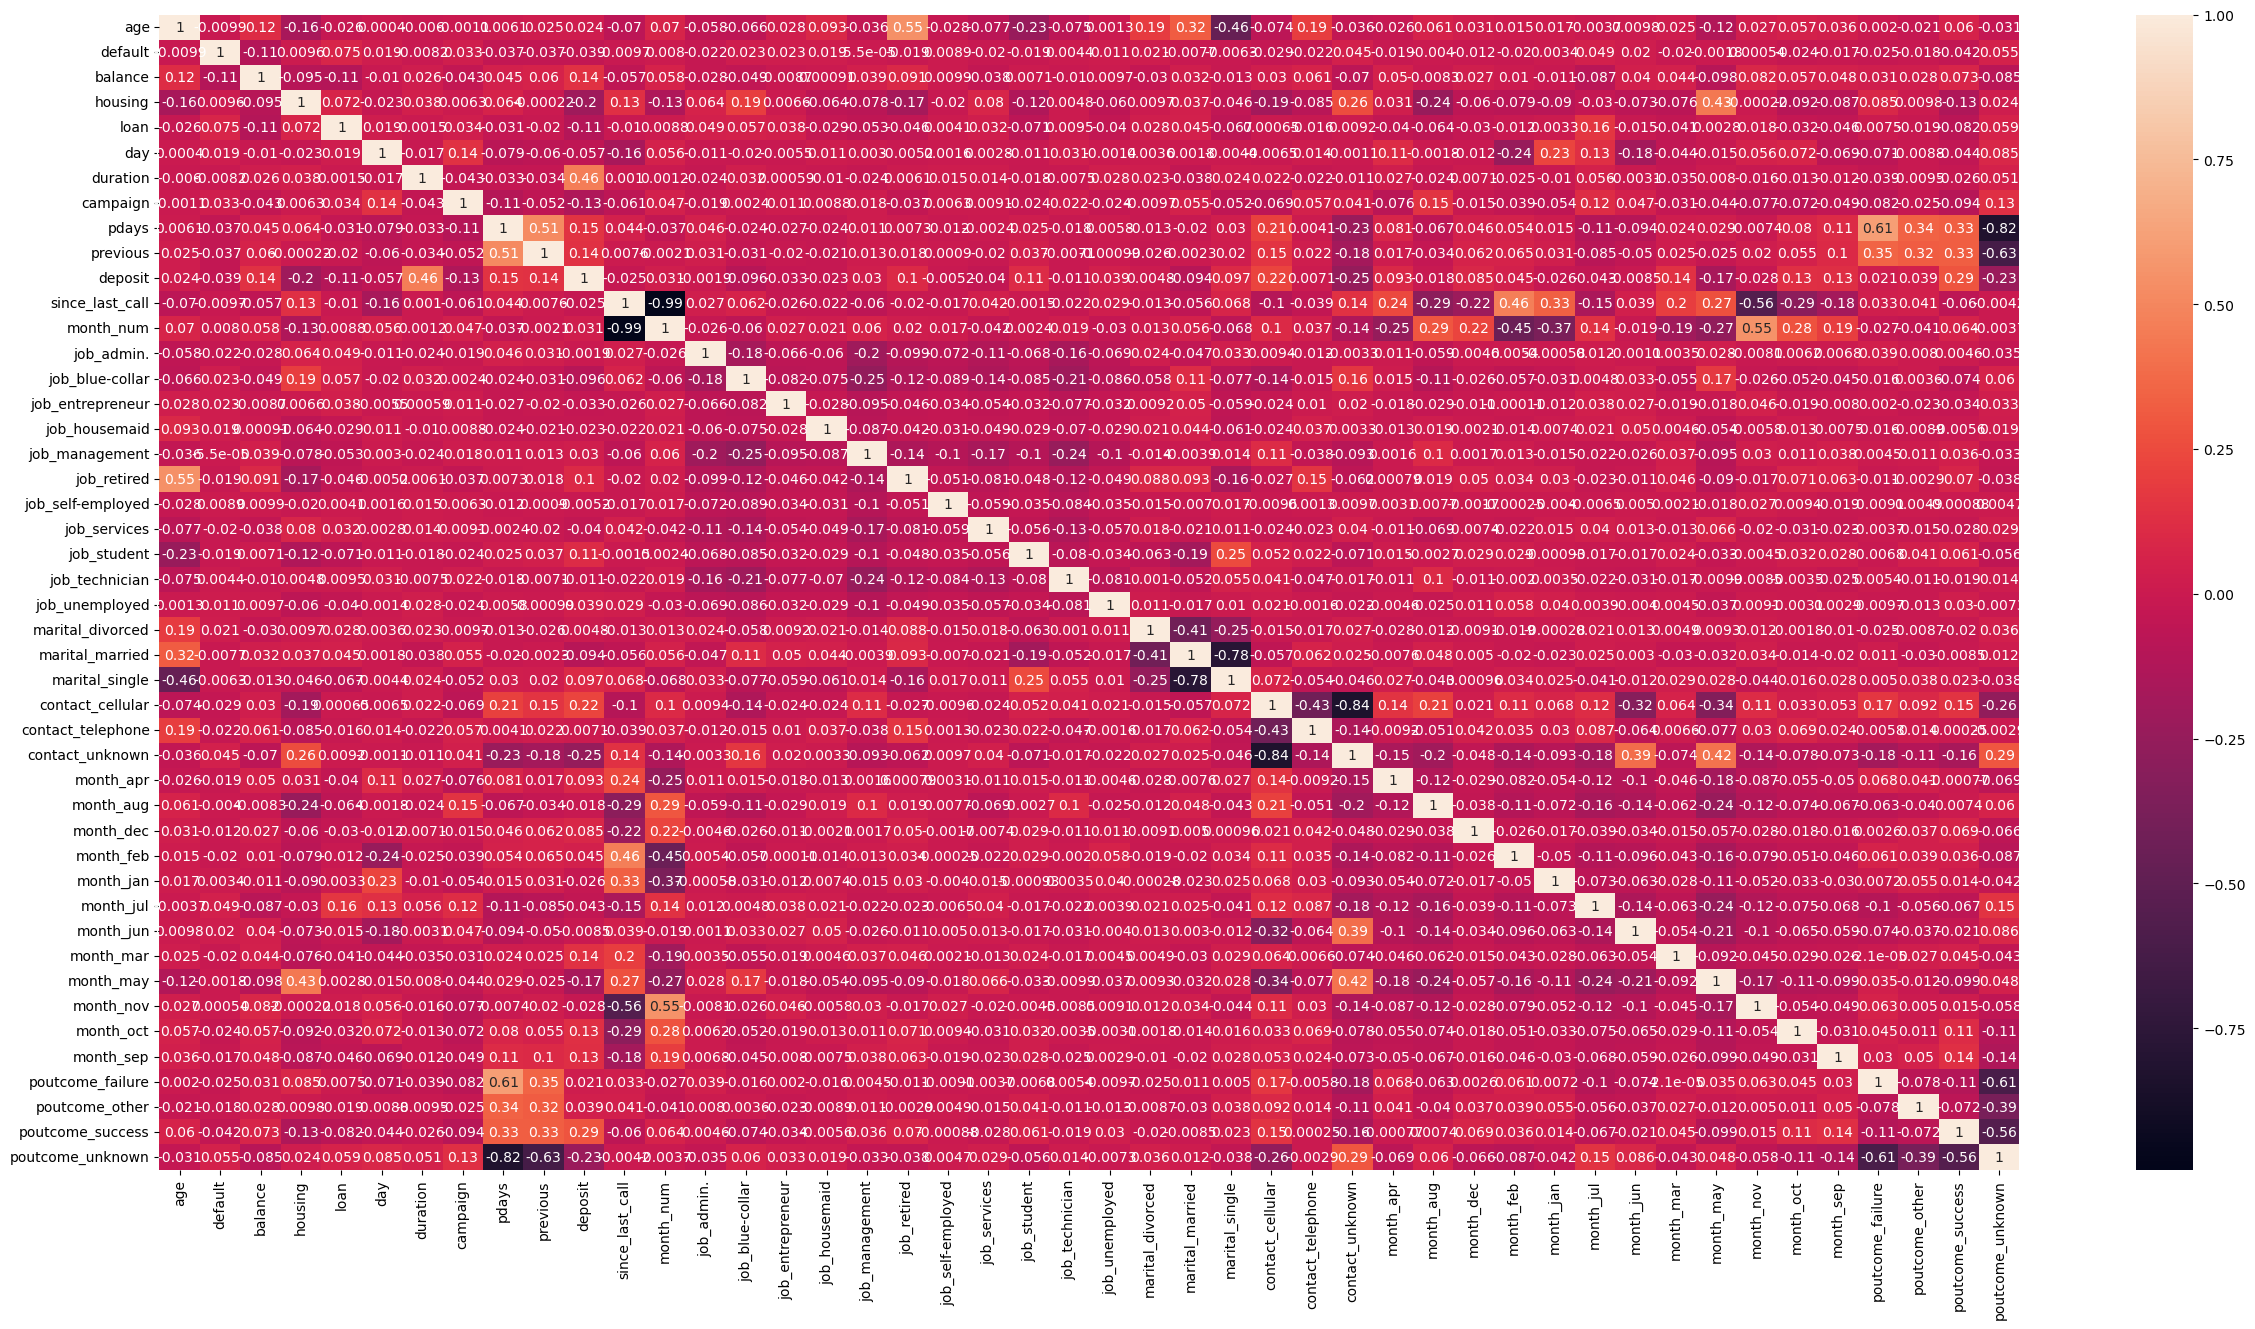

In [56]:
corr_matrix = dummies_features.corr(numeric_only=True)
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True)

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [3]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [4]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna